In [1]:
#READ DATASET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

coaches_data = pd.read_csv("../basketballPlayoffs/coaches.csv")


In [2]:
# SIZE OF DATA
coaches_data.shape

(162, 9)

In [3]:
# CHECK FOR DUPLICATED LINES
coaches_data.duplicated().any()

False

In [4]:
# SEE THE FIRST ROWS
coaches_data.head()

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,WNBA,0,17,17,1,2
1,adubari99w,1,NYL,WNBA,0,20,12,4,3
2,adubari99w,2,NYL,WNBA,0,21,11,3,3
3,adubari99w,3,NYL,WNBA,0,18,14,4,4
4,adubari99w,4,NYL,WNBA,0,16,18,0,0


In [5]:
# DESCRIPTION OF EACH ATTRIBUTE OF THE DATASET
coaches_data.describe()

,year,stint,won,lost,post_wins,post_losses
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,5.314815,0.364198,14.672840,14.623457,1.166667,1.172840
std,2.896715,0.693861,6.403445,5.678789,1.953656,1.316782
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,3.000000,0.000000,10.000000,11.000000,0.000000,0.000000
50%,5.000000,0.000000,16.000000,15.000000,0.000000,0.000000
75%,8.000000,0.000000,18.750000,18.000000,1.000000,2.000000
max,10.000000,2.000000,28.000000,30.000000,7.000000,5.000000


In [6]:
# DESCRIPTION OF FUEL ATTRIBUTE OF THE DATASET
coaches_data.describe(include='object')

,coachID,tmID,lgID
count,162,162,162
unique,57,20,1
top,donovan99w,WAS,WNBA
freq,9,13,162


In [7]:
# TYPES
coaches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   coachID      162 non-null    object
 1   year         162 non-null    int64 
 2   tmID         162 non-null    object
 3   lgID         162 non-null    object
 4   stint        162 non-null    int64 
 5   won          162 non-null    int64 
 6   lost         162 non-null    int64 
 7   post_wins    162 non-null    int64 
 8   post_losses  162 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 11.5+ KB


In [8]:
most_frequent_coaches = coaches_data['coachID'].value_counts().head(5)
print("\nCoaches with the Most Coaching Stints:")
print(most_frequent_coaches)


Coaches with the Most Coaching Stints:
donovan99w    9
hugheda99w    9
adubari99w    8
laimbbi01w    8
coopemi01w    8
Name: coachID, dtype: int64


In [9]:
most_frequent_teams = coaches_data['tmID'].value_counts().head(5)
print("\nTeams with the Most Coaching Stints:")
print(most_frequent_teams)


Teams with the Most Coaching Stints:
WAS    13
SAC    13
LAS    13
NYL    12
MIN    12
Name: tmID, dtype: int64


In [10]:
average_wins = coaches_data['won'].mean()
average_losses = coaches_data['lost'].mean()
print(f"\nAverage Wins per Coach: {average_wins:.2f}")
print(f"Average Losses per Coach: {average_losses:.2f}")


Average Wins per Coach: 14.67
Average Losses per Coach: 14.62


In [11]:
# TOTAL GAMES COACHED
coaches_data['total_games_played'] = coaches_data['won'] + coaches_data['lost']
coaches_by_total_games = coaches_data[['coachID', 'total_games_played']].drop_duplicates().sort_values(by='total_games_played', ascending=False)

print("\nCoaches with the Most Games Coached:")
print(coaches_by_total_games.head(10))
print("\nCoaches with the Least Games Coached:")
print(coaches_by_total_games.tail(10))


Coaches with the Most Games Coached:
       coachID  total_games_played
0   adamsmi01w                  34
43  cowenda01w                  34
56  donovan99w                  34
65  dunnli99wc                  34
70  fortnne99w                  34
71  gaineco01w                  34
73  gilloje01w                  34
74  grafca99wc                  34
85  hugheda99w                  34
93   keyst99wc                  34

Coaches with the Least Games Coached:
        coachID  total_games_played
50   dailesh99w                  12
92   kenlaje99w                  12
91   jenkica99w                  11
34   coopecy01w                  10
17   boguemu01w                  10
155  willigr99w                  10
51   dailesh99w                   8
24   bryanjo01w                   6
8    adubari99w                   4
105  laimbbi01w                   3


In [13]:
# TOTAL PLAYOFF GAMES COACHED
coaches_data['total_playoff_games_played'] = coaches_data['post_wins'] + coaches_data['post_losses']
coaches_by_total_playoff_games = coaches_data[['coachID', 'total_playoff_games_played']].drop_duplicates().sort_values(by='total_playoff_games_played', ascending=False)

print("\nCoaches with the Most Games Coached:")
print(coaches_by_total_playoff_games.head(10))
print("\nCoaches with the Least Games Coached:")
print(coaches_by_total_playoff_games.tail(10))


Coaches with the Most Games Coached:
        coachID  total_playoff_games_played
103  laimbbi01w                          11
72   gaineco01w                          11
66   dunnli99wc                          10
102  laimbbi01w                          10
38   coopemi01w                           9
104  laimbbi01w                           9
150  whisejo99w                           9
89   hugheda99w                           9
146  westhpa99w                           9
99   laimbbi01w                           8

Coaches with the Least Games Coached:
        coachID  total_playoff_games_played
107  maherto99w                           0
43   cowenda01w                           0
39   coopemi01w                           0
111  mcconsu01w                           0
33   coopecy01w                           0
114  mchugma99w                           0
116  meadoma99w                           0
67   dunntr01wc                           0
119  overtbo99w                           0

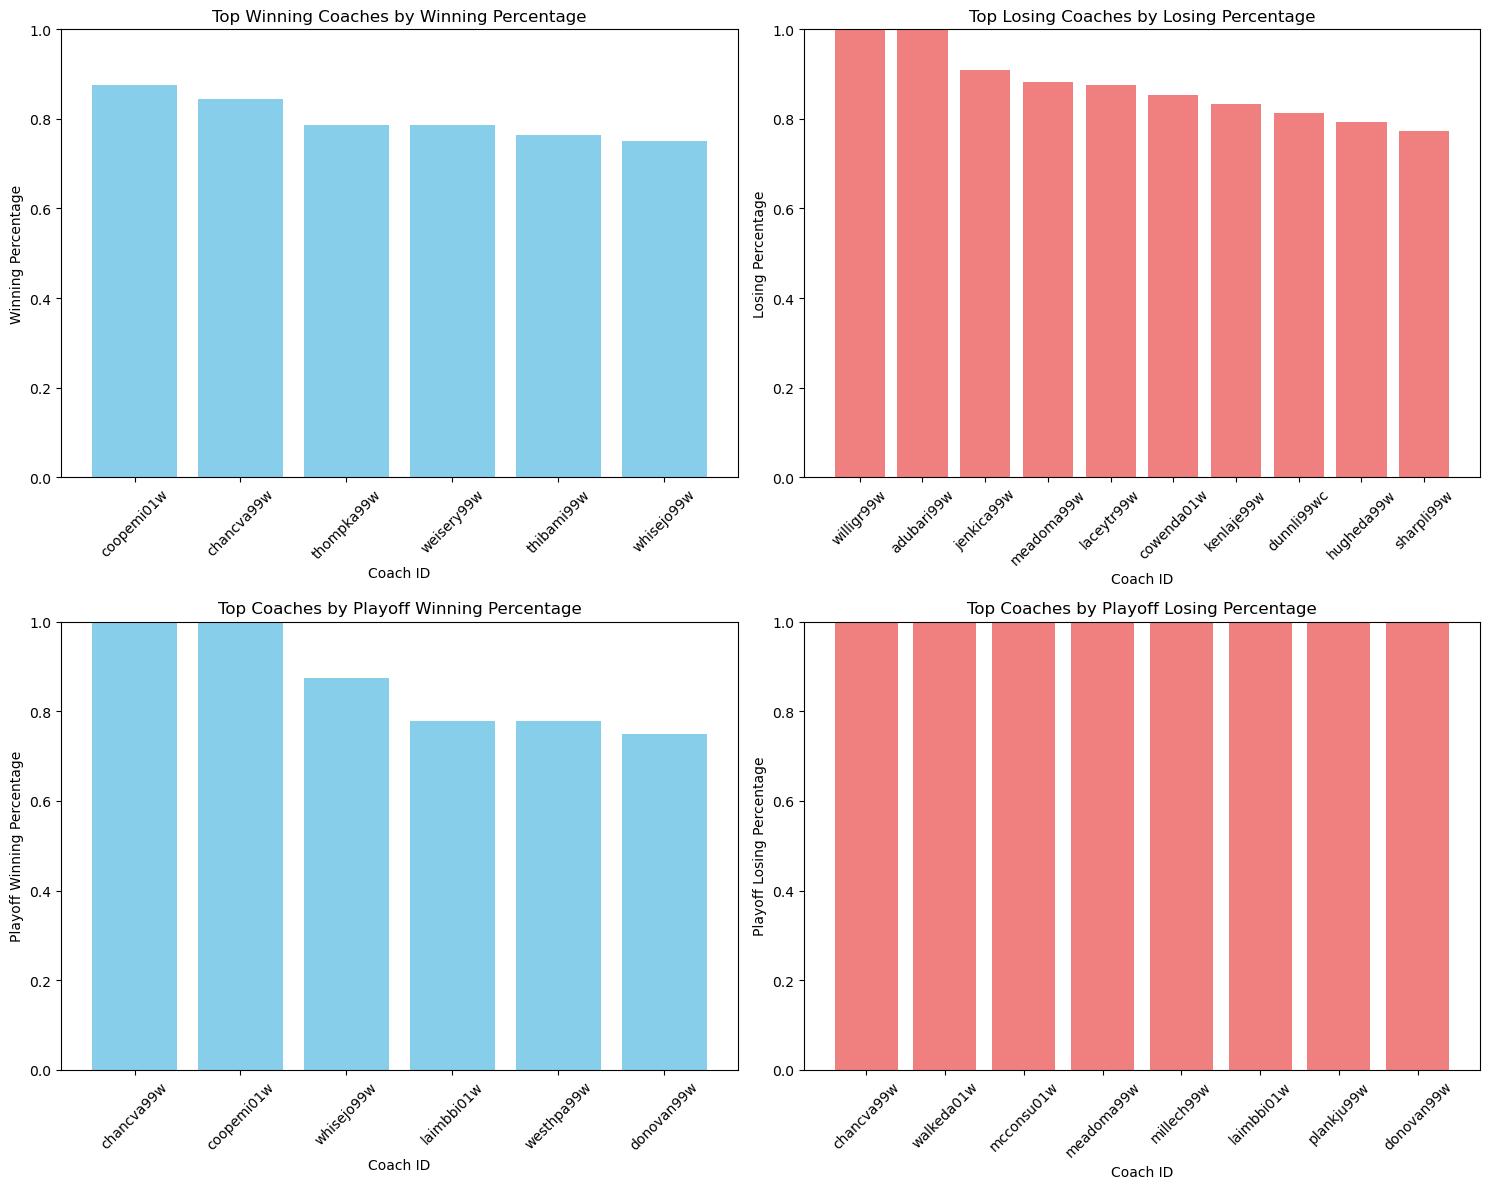

In [17]:
coaches_data['winning_percentage'] = coaches_data['won'] / coaches_data['total_games_played']
top_winning_percentage_coaches = coaches_data.sort_values(by='winning_percentage', ascending=False).head(10)

coaches_data['losing_percentage'] = coaches_data['lost'] / coaches_data['total_games_played']
top_losing_percentage_coaches = coaches_data.sort_values(by='losing_percentage', ascending=False).head(10)

coaches_data['playoff_winning_percentage'] = coaches_data['post_wins'] / coaches_data['total_playoff_games_played']
top_playoff_winning_percentage_coaches = coaches_data.sort_values(by='playoff_winning_percentage', ascending=False).head(10)

coaches_data['playoff_losing_percentage'] = coaches_data['post_losses'] / coaches_data['total_playoff_games_played']
top_playoff_losing_percentage_coaches = coaches_data.sort_values(by='playoff_losing_percentage', ascending=False).head(10)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].bar(top_winning_percentage_coaches['coachID'], top_winning_percentage_coaches['winning_percentage'], color='skyblue')
axes[0, 0].set_title('Top Winning Coaches by Winning Percentage')
axes[0, 0].set_xlabel('Coach ID')
axes[0, 0].set_ylabel('Winning Percentage')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim(0, 1)  

axes[0, 1].bar(top_losing_percentage_coaches['coachID'], top_losing_percentage_coaches['losing_percentage'], color='lightcoral')
axes[0, 1].set_title('Top Losing Coaches by Losing Percentage')
axes[0, 1].set_xlabel('Coach ID')
axes[0, 1].set_ylabel('Losing Percentage')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim(0, 1) 

axes[1, 0].bar(top_playoff_winning_percentage_coaches['coachID'], top_playoff_winning_percentage_coaches['playoff_winning_percentage'], color='skyblue')
axes[1, 0].set_title('Top Coaches by Playoff Winning Percentage')
axes[1, 0].set_xlabel('Coach ID')
axes[1, 0].set_ylabel('Playoff Winning Percentage')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylim(0, 1)  

axes[1, 1].bar(top_playoff_losing_percentage_coaches['coachID'], top_playoff_losing_percentage_coaches['playoff_losing_percentage'], color='lightcoral')
axes[1, 1].set_title('Top Coaches by Playoff Losing Percentage')
axes[1, 1].set_xlabel('Coach ID')
axes[1, 1].set_ylabel('Playoff Losing Percentage')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylim(0, 1)  

plt.tight_layout()
plt.show()